<a href="https://colab.research.google.com/github/sumanmichael/tabulardata-classification-deeplearning/blob/main/tabulardata_classification_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.6MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 194kB 14.5MB/s 
     |████████████████████████████████| 1.1MB 20.2MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
Mounted at /content/gdrive


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    
  

In [ ]:
!wget "https://dphi.s3.ap-south-1.amazonaws.com/dataset/train_age_dataset.csv"

--2020-12-06 08:55:18--  https://dphi.s3.ap-south-1.amazonaws.com/dataset/train_age_dataset.csv
Resolving dphi.s3.ap-south-1.amazonaws.com (dphi.s3.ap-south-1.amazonaws.com)... 52.219.62.95
Connecting to dphi.s3.ap-south-1.amazonaws.com (dphi.s3.ap-south-1.amazonaws.com)|52.219.62.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72490889 (69M) [text/csv]
Saving to: ‘train_age_dataset.csv’

train_age_dataset.c 100%[===================>]  69.13M  12.3MB/s    in 7.3s    

2020-12-06 08:55:26 (9.51 MB/s) - ‘train_age_dataset.csv’ saved [72490889/72490889]



In [ ]:
df = pd.read_csv("./train_age_dataset.csv")
df = df.drop(axis=1, columns=['Unnamed: 0', 'userId'])
df.columns

Index(['tier', 'gender', 'following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

In [ ]:
from fastbook import * 
from fastai.tabular.all import *

cont_columns = ['following_rate', 'followers_avg_age',
       'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2']

cat_columns = ['tier', 'gender']

dls = TabularDataLoaders.from_csv('train_age_dataset.csv', y_names="age_group",
                                    y_block=CategoryBlock,
                                    cat_names = cat_columns,
                                    cont_names = cont_columns,
                                    procs = [Categorify],
                                #   bs=128,
                                  )

In [ ]:
config = tabular_config(ps=0.1,)

learn = tabular_learner(dls,
                        # config=config,
                        # layers=[50,50,50,50],
                        metrics=[F1Score(average="weighted")])
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
    (1): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(22, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): BatchNorm1d(28, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=28, out_features=200, bias=False)
      (2): ReLU(inplace=True)
    )
    (1): LinBnDrop(
      (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Linear(in_features=200, out_features=100, bias=False)
      (2): ReLU(inplace=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=4, bias=True)
    )
  )
)

SuggestedLRs(lr_min=0.025118863582611083, lr_steep=0.005248074419796467)

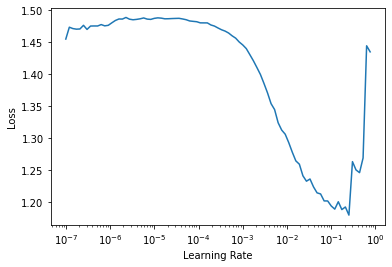

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(50, 0.005)
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,f1_score,time
0,0.664091,1.106459,0.644363,01:15
1,0.663754,1.387534,0.412090,01:15
2,0.654172,1.559143,0.234854,01:15
3,0.664508,1.666531,0.383822,01:15
4,0.629640,1.800709,0.366972,01:15
5,0.641031,1.834711,0.353671,01:15
6,0.648213,2.525837,0.322676,01:16
7,0.647024,2.298432,0.375832,01:15
8,0.655525,1.808150,0.313464,01:16
9,0.660353,2.327200,0.251531,01:15


Buffered data was truncated after reaching the output size limit.